#REF
https://fbref.com/en/comps/9/2018-2019/stats/2018-2019-Premier-League-Stats


In [44]:
import pandas as pd
#Instanciar dfs
df_premier1819 =  pd.read_csv('premier_1819.csv', skiprows= 1)
df_premier1920 =  pd.read_csv('premier_1920.csv', skiprows= 1)
df_efl1819 =      pd.read_csv('elf_1819.csv')
df_efl1920 =      pd.read_csv('elf_1920.csv')


dfs = [df_premier1819, df_premier1920, df_efl1819, df_efl1920]

In [45]:
#Dropar lixos
for df in dfs:
    filt = df['Player'] == 'Player'
    df.drop(df[filt].index, inplace=True)
df_efl1920.head(6)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,1,Charlie Adam,sct SCO,MF,Reading,33,1985,21,8,782,...,0.12,0.35,0.12,0.23,0.27,0.21,0.48,0.18,0.39,Matches
1,2,Tosin Adarabioyo,eng ENG,DF,Blackburn,21,1997,34,33,"2,966",...,0.03,0.12,0.09,0.12,0.04,0.01,0.05,0.04,0.05,Matches
2,3,Albert Adomah,gh GHA,FW,Cardiff City,31,1987,9,9,733,...,0.25,0.25,0.00,0.25,0.15,0.11,0.25,0.15,0.25,Matches
3,4,Albert Adomah,gh GHA,"FW,MF",Nott'ham Forest,31,1987,24,5,612,...,0.15,0.44,0.29,0.44,0.20,0.16,0.36,0.20,0.36,Matches
4,5,Benik Afobe,cd COD,FW,Stoke City,26,1993,1,1,70,...,0.00,0.00,0.00,0.00,0.09,0.00,0.09,0.09,0.09,Matches
5,6,Benik Afobe,cd COD,FW,Bristol City,26,1993,12,8,739,...,0.00,0.37,0.24,0.24,0.51,0.04,0.55,0.41,0.45,Matches


In [46]:
#Agora que os dados estão limpos, descobrir as posições de jogadores que constam no DF
df_efl1819['Pos'].unique().tolist()

['DF', 'MF,FW', 'FW', 'MF', 'DF,MF', 'MF,DF', 'GK', 'FW,MF', 'DF,FW', 'FW,DF']

In [47]:
#Adicionar FLAG de 'dificuldade' da liga

df_premier1819['liga_nivel'] = 1
df_premier1920['liga_nivel'] = 1

df_efl1819['liga_nivel'] = 0.5
df_efl1920['liga_nivel'] = 0.5

In [48]:
#Selecionar apenas meio campistas.

meio_campo =  ['DM' , 'FW,MF', 'MF', 'MF,DF',  'DF,MF', 'RM', 'LM', 'WM', 'AM']

filt1 = df_premier1819['Pos'].isin(meio_campo)
df_premier1819_mc = df_premier1819[filt1]

filt2 = df_premier1920['Pos'].isin(meio_campo)
df_premier1920_mc = df_premier1920[filt2]

filt3 = df_efl1819['Pos'].isin(meio_campo)
df_efl1819_mc = df_efl1819[filt3]

filt4 = df_efl1920['Pos'].isin(meio_campo)
df_efl1920_mc = df_efl1920[filt4]

mcs  = [df_premier1819_mc, df_premier1920_mc, df_efl1819_mc, df_efl1920_mc]

In [49]:
# Saber quais MC(meio campistas), jogaram a EFL 1819 E A PREMIER 1920
jogadores_elf1819_to_premier1920= list(set(df_efl1819_mc['Player']).intersection(df_premier1920_mc['Player']))
jogadores_premier1819_to_elf1920 = list(set(df_premier1819_mc['Player']).intersection(df_efl1920_mc['Player']))

jogadores_interessados = jogadores_elf1819_to_premier1920 + jogadores_premier1819_to_elf1920
jogadores_interessados

['Tom Trybull',
 'Marco Stiepermann',
 'Alexander Tettey',
 'Kenny McLean',
 'John Fleck',
 'Jack Rodwell',
 'John Lundstram',
 'Jota',
 'Callum Robinson',
 'Mario Vrančić',
 'Oliver Norwood',
 'Muhamed Bešić',
 'Josh Brownhill',
 'Conor Hourihane',
 'Henri Lansbury',
 'John McGinn',
 'Elias Kachunga',
 'Jonathan Hogg',
 'Luke Amos',
 'Leandro Bacuna',
 'Kevin McDonald',
 'Kadeem Harris',
 'Callum Paterson',
 'Matty Daly',
 'Stefan Johansen',
 'Harry Arter',
 'Joe Ralls',
 'Bobby Reid',
 'Adama Diakhaby',
 'Ivan Cavaleiro',
 'Floyd Ayité']

In [50]:
#Montar um Dataframe, com apenas os jogadores interessados na temporada 18 - 19
df_mc_1819 = pd.concat([df_premier1819_mc, df_efl1819_mc], ignore_index= True)
filtmcs = df_mc_1819['Player'].isin(jogadores_interessados)
df_mc_1819 = df_mc_1819[filtmcs]

df_mc_1819.reset_index(inplace= True)
df_mc_1819.drop(columns = ['Matches'], inplace= True)

df_mc_1819.head(6)

,index,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,...,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,liga_nivel
0,3,12,Luke Amos,eng ENG,MF,Tottenham,21,1997,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
1,5,19,Harry Arter,ie IRL,MF,Cardiff City,28,1989,25,24,...,0.05,0.05,0.00,0.05,0.04,0.02,0.06,0.04,0.06,1.0
2,7,25,Floyd Ayité,tg TOG,"FW,MF",Fulham,29,1988,16,3,...,0.00,0.19,0.19,0.19,0.07,0.10,0.17,0.07,0.17,1.0
3,10,29,Leandro Bacuna,cw CUW,MF,Cardiff City,26,1991,11,4,...,0.00,0.00,0.00,0.00,0.02,0.01,0.03,0.02,0.03,1.0
4,21,74,Ivan Cavaleiro,pt POR,"FW,MF",Wolves,24,1993,23,6,...,0.13,0.52,0.39,0.52,0.29,0.20,0.48,0.29,0.48,1.0
5,31,99,Matty Daly,eng ENG,MF,Huddersfield,17,2001,2,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0


Até aqui, o trabalho foi apenas procurar os jogadores que tiveram essa mudança, de uma liga superior para inferior, ou inferior para superior. Agora, vamos começar a extrair o Y para começar a treinar o modelo.

Como o dado não é tão grande, queria usar um Y que medisse de forma justa o desempenho do jogador na temporada, e para isso, extrai manualmente a nota média da temporada seguinte no sofascore

In [51]:
jogadores = df_mc_1819['Player'].unique().tolist()

notas_sofascore = {
    'Luke Amos': 6.66,
    'Harry Arter': 6.81,
    'Floyd Ayité' : 6.90,
    'Leandro Bacuna': 6.59,
    'Ivan Cavaleiro': 6.97,
    'Matty Daly': 6.58,
    'Adama Diakhaby': 6.65,
    'Kadeem Harris': 6.74,
    'Jonathan Hogg': 6.77,
    'Stefan Johansen': 6.78,
    'Elias Kachunga': 6.63,
    'Kevin McDonald': 6.66,
    'Callum Paterson': 6.71,
    'Joe Ralls': 7.06,
    'Bobby Reid': 6.76,
    'Muhamed Bešić': 6.77,
    'Josh Brownhill': 7.15,
    'John Fleck': 7.01,
    'Conor Hourihane': 7.23,
    'Jota': 6.81,
    'Henri Lansbury': 6.49,
    'John Lundstram': 6.86,
    'John McGinn': 6.95,
    'Kenny McLean': 6.83,
    'Oliver Norwood': 7.02,
    'Callum Robinson': 6.88,
    'Jack Rodwell': 6.50,
    'Marco Stiepermann': 6.42,
    'Alexander Tettey': 6.72,
    'Tom Trybull': 6.63,
    'Mario Vrančić': 6.57
}

In [52]:
#Adicionar o y ao df, Sendo y a nota do jogador no sofascore no período seguinte da análise.

df_mc_1819['Y'] = df_mc_1819['Player'].map(lambda x: notas_sofascore.get(x))
df_mc_1819.head(6)

,index,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,...,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,liga_nivel,Y
0,3,12,Luke Amos,eng ENG,MF,Tottenham,21,1997,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,6.66
1,5,19,Harry Arter,ie IRL,MF,Cardiff City,28,1989,25,24,...,0.05,0.00,0.05,0.04,0.02,0.06,0.04,0.06,1.0,6.81
2,7,25,Floyd Ayité,tg TOG,"FW,MF",Fulham,29,1988,16,3,...,0.19,0.19,0.19,0.07,0.10,0.17,0.07,0.17,1.0,6.90
3,10,29,Leandro Bacuna,cw CUW,MF,Cardiff City,26,1991,11,4,...,0.00,0.00,0.00,0.02,0.01,0.03,0.02,0.03,1.0,6.59
4,21,74,Ivan Cavaleiro,pt POR,"FW,MF",Wolves,24,1993,23,6,...,0.52,0.39,0.52,0.29,0.20,0.48,0.29,0.48,1.0,6.97
5,31,99,Matty Daly,eng ENG,MF,Huddersfield,17,2001,2,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,6.58


In [53]:
df_mc_1819.columns

Index(['index', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'liga_nivel', 'Y'],
      dtype='object')

Com todas as features prontas, vamos começar a treinar o modelo, vamos experimentar quanto cada feature impacta no modelo.

In [54]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
#Vamos testar o primeiro conjunto de features
X = df_mc_1819[['Age', 'Starts', '90s', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'PrgC', 'PrgP', 'liga_nivel']]
y = df_mc_1819["Y"]

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=101)

In [57]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

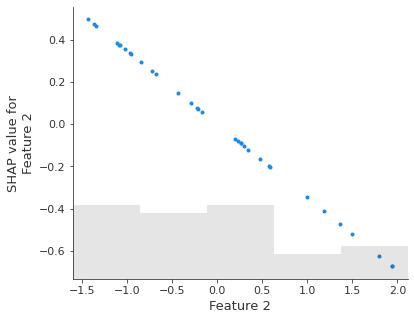

In [58]:
explainer = shap.explainers.Linear(model, X_std)
shap_values = explainer(X_std)
shap.plots.scatter(shap_values[:, 2])

In [59]:
X100 = shap.utils.sample(X_std, 100) # 100 instances for use as the background distribution
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

Age = 0.00444
Starts = 0.286
90s = -0.34606
Gls = -0.04329
Ast = -0.0252
G+A = -0.03793
xG = 0.15001
xAG = 0.19788
PrgC = -0.07538
PrgP = 0.07479
liga_nivel = 0.05507


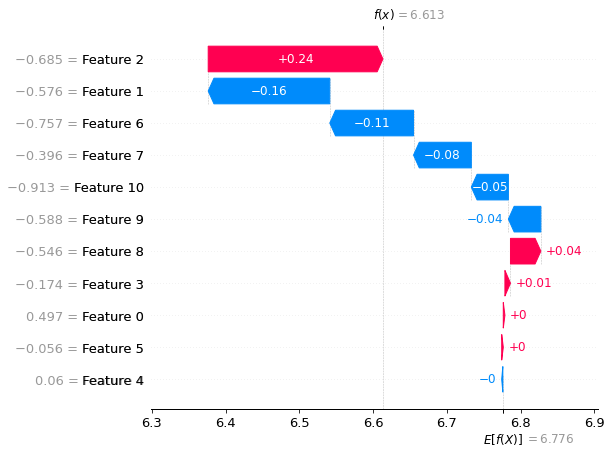

In [60]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_std)

# make a standard partial dependence plot
sample_ind = 20
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

In [61]:
predictions = model.predict(X_test)
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  0.06085775832001652
mean_absolute_error :  0.18397392581832817


In [64]:
#Testar o modelo
df_messi = pd.DataFrame({'Age': [28], 'Starts': [31], '90s': [30.3], 'Gls': [26], 'Ast': [14], 'G+A': [40], 'xG': [15], 'xAG': [30.8], 'PrgC': [150], 'PrgP':[100], 'liga_nivel': [1]})
x_Messi = scaler.transform(df_messi)

In [65]:
y_pred = model.predict(x_Messi)
y_pred

array([8.50722265])